# _K NEAREST NEIGHBORS ALGORITHM_

### MODEL REPRESENTATION:
The model representation for KNN is the entire training dataset which is used to make predictions on new data by searching through the entire training set for the k most similar instances and summarizing the output variable for those k instances.

KNN can be used for regression and classification tasks. For regression, the algorithm prediction might be the mean output variable, in classification this might be the mode (or most common) class value.

To determine which of the k instances in the training dataset are most similar to a new input a distance measure is used. The most popular distance measure is Euclidean distance but there are other options that may sometimes be better, for example:
- Manhatan distance (L1 Norm)
- Edit distance (How many add/delete/substitutions are required to transform one string to the other)
- Correlation distance (Measures how correlated two vectors are for signal detection)


### Euclidean distance:

**Let $x = (x_1,x_2,x_3,...,x_n)$, $j = (j_1,j_2,j_3,...,j_n)$ be points in $R^n$ space, and $D$ the Euclidean distance, then:**
** **
$$D = \sqrt{(x_1 - j_1)^2 + (x_2 - j_2)^2 + (x_3 - j_3)^2 + .... + (x_n - j_n)^2}$$
** **

KNN works well with a small number of input variables, but struggles when the number of inputs is very large. Each input variable can be considered a dimension of a n-dimensional input space. As the number of dimensions increases the volume of the input space increases at an exponential rate.

In high dimensions, points that may be similar may have very large distances. All points will be far away from each other and our intuition for distances in simple 2 and 3 dimensional spaces breaks down.

## PROCESSING DATA FOR KNN:

In order to setup a good training dataset that can be used for KNN model some pre-processing should be done on the dataset.

1.- Scailing data: KNN performs much better if all of the data has the same scale. Normalizing the data to the range [0,1] is a good idea. It may also be a good idea to Standardize the data if it has a Gaussian distribution.

2.- Missing data: Missing data must be addressed due to the distance between samples cannot be calculated.
** **

Ok, let's start with the implementation of `K Nearest Neighbor` from scratch. The Algorithm is very simple yet very effective. Two main steps have to be implemented for the `K Nearest Neighbor`:

**1.- How to calculate the Euclidean distance between real valued vectors**

**2.- How to use Euclidean distance and the training dataset to make predictions for new data**


In [1]:
##IMPORTING ALL NECESSARY SUPPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def euclidean(V1, V2):
    '''
    arguments:
        > V1: List of numbers for a vector in R^n
        > V2: List of numbers for a vector in R^n
    returns:
        > The Euclidean distance of V1 & V2
    '''
    ##GETTING THE SQUARE DIFFERENCES
    sqr_diff = [(x - j)**2 for x,j in zip(V1, V2)]
    ##CALCULATING THE EUCLIDEAN DISTANCE
    e_dist = sum(sqr_diff)**0.5
    
    return e_dist

In [3]:
def knn_predict(train, labels, point, k, model):
    '''
    arguments:
        > train: array type, used as training dataset
        > labels: array type, lables of training dataset
        > point: array type, test point
        > k: integer, number of neighbors used to estimate prediction
        > model: string, type of prediction: 'C' for Classification or 'R' for Regression
    returns:
        > The prediction made for test point according with model selected
    '''
    ##CALCULATING EUCLIDEAN DISTANCES
    distances = []
    for i, row in enumerate(train):
        distances.append((labels[i],euclidean(row, point)))
    ##SORT LIST BASED ON DISTANCES
    distances.sort(key = lambda d: d[1])
    ##GETTING VOTES FROM NEIGHBORS
    neighbors = [distances[n][0] for n in range(k)]
    
    ##PREDICTING TARGET ACCORDING WITH MODEL SELECTION
    if model == 'C':
        prediction = int(max(set(neighbors), key = neighbors.count))
    elif model == 'R':
        prediction = sum(neighbors)/float(len(neighbors))
    
    return prediction

In order to verify proper implementation a **toy dataset** is used to evaluate the algorithm.

In [4]:
data = pd.read_csv('./data/Toy.csv')
data

,X1,X2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.393533,2.331273,0
3,3.110073,1.781540,0
4,1.343809,3.368361,0
5,3.582294,4.679179,0
6,2.280362,2.866990,0
7,7.627531,2.759262,1
8,5.332441,2.088627,1
9,7.423437,4.696523,1


One of the points in the dataset is selected and a prediction is run

In [5]:
jp = data.iloc[11,:-1].values
train = data.drop(['y'], axis=1).values
lables = data['y'].values
pred = knn_predict(train, lables, jp, 3, 'C')
pred

1

The points are graphed.
- All points of Class = 0 are colored in green
- All points of Class = 1 are colored in red
- The test point is colored in black

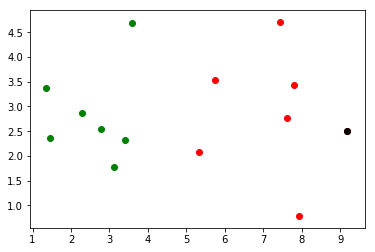

In [6]:
x10 = data.loc[data['y']==0].iloc[:,-3].values
x20 = data.loc[data['y']==0].iloc[:,-2].values
x11 = data.loc[data['y']==1].iloc[:,-3].values
x21 = data.loc[data['y']==1].iloc[:,-2].values
xp = jp[0]
yp = jp[1]
plt.scatter(x10,x20,c='g')
plt.scatter(x11,x21,c='r')
plt.scatter(xp,yp,c='k')
plt.show()

# KNN APPLICATION

During the cleaning data process it is important to check for missing data, if missing data is more than **5%** an imputation technique should be applied to the dataset. `K Nearest Neighbors` can be used as imputation technique in this case.

The _Titanic_ dataset is used to apply our KNN algorithm developed. Using the regression model all missing data on the _`Age`_ feature are estimated.

In [7]:
##LOADING 'TITANIC' DATASET
col = ['Pclass', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Age']
Titanic = pd.read_csv('./data/titanic.csv', usecols = col)
Titanic.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,3,male,35.0,0,8.0500,S


In [8]:
##GETTING PERCENTAGE OF MISSING VALUES FOR EACH FEATURE
print('missing data for Pclass:   ',round(Titanic['Pclass'].isnull().mean()*100,2),'[%]')
print('missing data for Sex:      ',round(Titanic['Sex'].isnull().mean()*100,2),'[%]')
print('missing data for Age:      ',round(Titanic['Age'].isnull().mean()*100,2),'[%]')
print('missing data for SibSp:    ',round(Titanic['SibSp'].isnull().mean()*100,2),'[%]')
print('missing data for Fare:     ',round(Titanic['Fare'].isnull().mean()*100,2),'[%]')
print('missing data for Embarked: ',round(Titanic['Embarked'].isnull().mean()*100,2),'[%]')

missing data for Pclass:    0.0 [%]
missing data for Sex:       0.0 [%]
missing data for Age:       19.87 [%]
missing data for SibSp:     0.0 [%]
missing data for Fare:      0.0 [%]
missing data for Embarked:  0.22 [%]


In [9]:
##DUE TO 'EMBARKED' FEATURE HAS LESS THAT 5% OF MISSING DATA ALL ITS NULL VALUES ARE DISCARDED
print('Dataset original size: ', Titanic.shape)
Titanic = Titanic.loc[Titanic['Embarked'].notnull()]
print('Dataset not-null size: ', Titanic.shape)

Dataset original size:  (891, 6)
Dataset not-null size:  (889, 6)


In [10]:
##FEATURE VARIABLES SUCH AS 'SEX' & 'EMBARKED' SHOULD BE ENCODED IN ORDER TO BE USED
one_hot = ['Sex','Embarked']
Titanic = pd.get_dummies(Titanic, prefix = one_hot, columns = one_hot, drop_first = True)
Titanic.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,1,0,1
1,1,38.0,1,71.2833,0,0,0
2,3,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,0,0,1
4,3,35.0,0,8.0500,1,0,1


In [11]:
##GETTING THE TRAIN DATASET
df_train = Titanic[Titanic.Age.notnull()]
##GETTING THE DATASET TO BE IMPUTED (ONLY 10 VALUES)
df_impute = Titanic[Titanic.Age.isnull()].drop('Age', axis = 1).tail(10)

In [12]:
##PREDICTING 'AGE' VALUES WITH KNN
train = df_train.drop(['Age'], axis = 1).values
labels = df_train['Age'].values
impute = df_impute.values
age_impute = []
for jp in impute:
    age_impute.append(knn_predict(train, labels, jp, 5, 'R'))

age_impute

[24.8, 25.8, 41.8, 37.0, 39.8, 24.8, 37.0, 26.2, 29.6, 26.8]

To compare our predictions on feature _`Age`_ the library `sklearn` is used

In [13]:
##GET AND INSTANCIATE KNN MODEL
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
##GET TRAINING DATA
X_train = df_train.drop('Age', axis = 1)
y_train = df_train['Age']
##FIT MODEL
knr.fit(X_train, y_train)
#GET PREDICTIONS
imputed_ages = knr.predict(df_impute)
imputed_ages

array([24.8, 27.9, 41.8, 37. , 39.8, 24.8, 37. , 23.4, 33. , 26.8])